In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# feature classification
classification_features = ['uploads', 'video views', 'subscribers']

# Drop rows with missing target
data = data.dropna(subset=['category'] + classification_features)

data['category_encoded'] = data['category'].astype('category').cat.codes


X = data[classification_features]
y = data['category_encoded']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize
rf_model = RandomForestClassifier(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# predictions
y_pred = rf_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.36      0.31      0.33        13
           2       0.00      0.00      0.00         8
           3       0.27      0.44      0.33        48
           4       0.00      0.00      0.00        10
           5       0.21      0.25      0.23        20
           6       0.00      0.00      0.00        11
           8       0.41      0.59      0.48        34
           9       0.00      0.00      0.00         7
          11       0.20      0.12      0.15        24
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1

    accuracy                           0.28       190
   macro avg       0.11      0.13      0.12       190
weighted avg       0.21      0.28      0.24       190



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


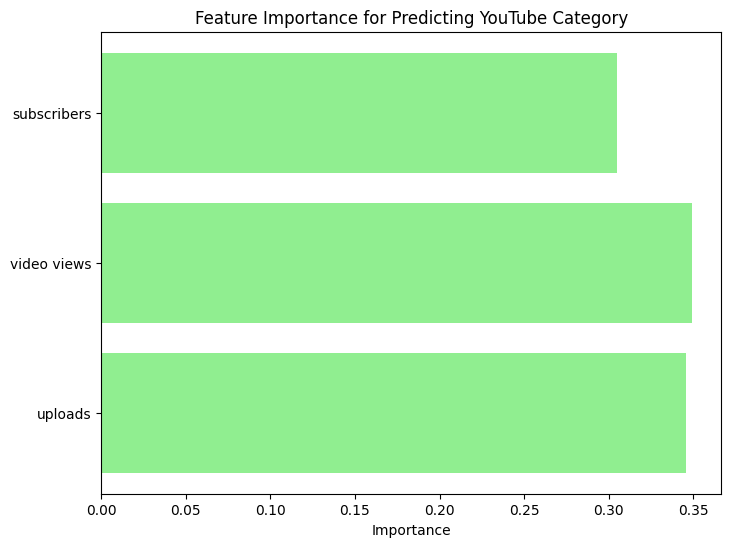

In [11]:
# Calculate feature importance
importances = rf_model.feature_importances_
feature_names = classification_features

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting YouTube Category')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
